In [0]:
# !pip install tensorflow==2.0

In [0]:
# !pip install lime

## Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
from lime import lime_image
from skimage.io import imread
from skimage.segmentation import mark_boundaries

import tensorflow as tf
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [22]:
tf.__version__

'2.0.0'

# Using Inception
Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools

In [0]:
inet_model = inc_net.InceptionV3()

In [0]:
def transform_img_fn(img_path):
    out = []
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inc_net.preprocess_input(x)
    out.append(x)
    return np.vstack(out)

('n03770679', 'minivan', 0.548507)
('n02930766', 'cab', 0.059977494)
('n03459775', 'grille', 0.044415995)
('n04285008', 'sports_car', 0.029702583)
('n03670208', 'limousine', 0.024144895)


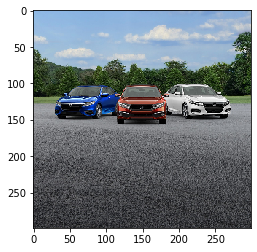

In [25]:
images = transform_img_fn('cars.jpg')
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

# Explanation

In [0]:
explainer = lime_image.LimeImageExplainer()

`hide_color` is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels. Here, we set it to 0 (in the representation used by inception model, 0 means gray)

In [27]:
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=2, num_samples=1000)

**Quite Slow!!!**

### Explanation for the top class

We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden

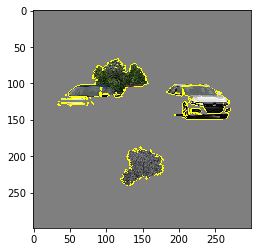

In [29]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or with the rest of the image present:

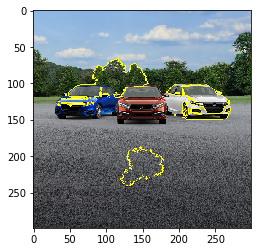

In [30]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


We can also see the 'pros and cons' (pros in green, cons in red)

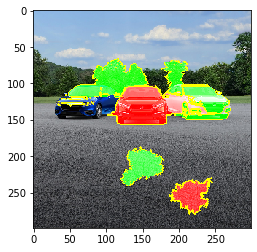

In [31]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or the pros and cons that have weight at least 0.1

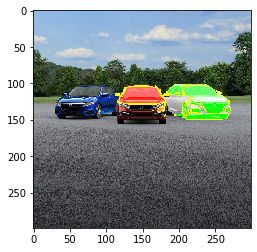

In [32]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))